In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
from sklearn.impute import KNNImputer as KNN

In [12]:
pd.set_option('display.max_columns', None)

In [2]:
Transactions = pd.read_excel('ANZ synthesised transaction dataset.xlsx', date_parser=[11])

In [13]:
Transactions.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [14]:
Transactions.tail()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,14054.14,2018-10-31,F,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,9137.79,2018-10-31,M,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,45394.57,2018-10-31,M,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,11350.67,2018-10-31,M,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit
12042,authorized,1.0,NaN,ACC-1443681913,AUD,150.92 -33.77,SALES-POS,f31f4b14-2040-40ec-a120-b141bb274cbd,NaN,Ryan,5517.91,2018-10-31,M,31,Mascot,NSW,2018-10-31T23:59:44.000+0000,22.36,6d5218e04e8040b9996850ce11a19426,Australia,CUS-3129499595,151.19 -33.93,debit


In [15]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [19]:
# remove cols with too many missing data
Transactions = Transactions.drop(axis=1, columns=['bpay_biller_code', 'merchant_code'])

In [22]:
Transactions.isna().sum()
# 5 cols have 37% missing data 

status                  0
card_present_flag    4326
account                 0
currency                0
long_lat                0
txn_description         0
merchant_id          4326
first_name              0
balance                 0
date                    0
gender                  0
age                     0
merchant_suburb      4326
merchant_state       4326
extraction              0
amount                  0
transaction_id          0
country                 0
customer_id             0
merchant_long_lat    4326
movement                0
dtype: int64

In [20]:
Transactions.describe()
# extreme large values in balance, age, and amount

,card_present_flag,balance,age,amount
count,7717.000000,12043.000000,12043.000000,12043.000000
mean,0.802644,14704.195553,30.582330,187.933588
std,0.398029,31503.722652,10.046343,592.599934
min,0.000000,0.240000,18.000000,0.100000
25%,1.000000,3158.585000,22.000000,16.000000
50%,1.000000,6432.010000,28.000000,29.000000
75%,1.000000,12465.945000,38.000000,53.655000
max,1.000000,267128.520000,78.000000,8835.980000


Text(0.5, 0, 'amount')

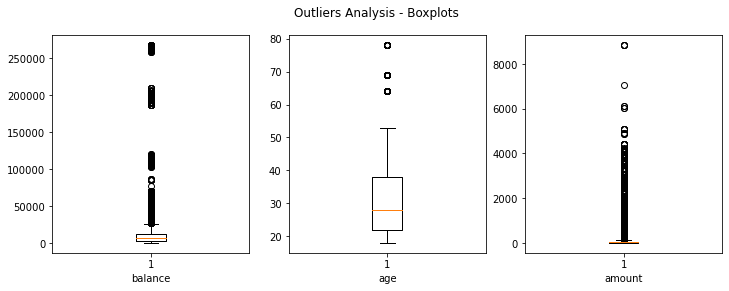

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Outliers Analysis - Boxplots')
axes[0].boxplot(Transactions.balance)
axes[0].set_xlabel('balance')
axes[1].boxplot(Transactions.age)
axes[1].set_xlabel('age')
axes[2].boxplot(Transactions.amount)
axes[2].set_xlabel('amount')

In [47]:
Transactions[Transactions.amount>7000]
# when checking the number of extreme values in amount, I noticed that txn_description might be related to missing values.

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
2401,posted,NaN,ACC-1523339231,AUD,115.83 -31.90,PAY/SALARY,NaN,Tim,62647.22,2018-08-20,M,40,NaN,NaN,2018-08-20T13:00:00.000+0000,8835.98,b608ce5142664a79af4fa071a886c8f7,Australia,CUS-1816693151,NaN,credit
6529,posted,NaN,ACC-1523339231,AUD,115.83 -31.90,PAY/SALARY,NaN,Tim,70242.78,2018-09-20,M,40,NaN,NaN,2018-09-20T13:00:00.000+0000,8835.98,854ded55d0034ac8b9e91e16334768ca,Australia,CUS-1816693151,NaN,credit
10429,posted,NaN,ACC-1523339231,AUD,115.83 -31.90,PAY/SALARY,NaN,Tim,77054.31,2018-10-19,M,40,NaN,NaN,2018-10-19T13:00:00.000+0000,8835.98,873a3f11d03d41a99c55a5b1a3850e1a,Australia,CUS-1816693151,NaN,credit
10430,posted,NaN,ACC-1523339231,AUD,115.83 -31.90,PAY/SALARY,NaN,Tim,85890.29,2018-10-19,M,40,NaN,NaN,2018-10-19T13:00:00.000+0000,8835.98,d996300131a641c8bf25f86e1aef9bc6,Australia,CUS-1816693151,NaN,credit
10711,authorized,1.0,ACC-819621312,AUD,145.04 -37.85,POS,af835ef4-60b7-4283-9d9a-5d0a8ab9cd6f,Michele,2063.14,2018-10-21,F,30,South Brisbane,QLD,2018-10-21T14:49:45.000+0000,7081.09,2a882afd1d1c4eb28c3b5ccba14e240d,Australia,CUS-1271030853,153.02 -27.48,debit


In [55]:
Transactions.merchant_suburb.groupby(Transactions.txn_description).describe()
# thus, I count the number of transactions for each txn_description, 
# turns that that only POS and sales-POS are related to customer transactions.
# the rest contains only missing values related to merchant and can be removed from the dataset

,count,unique,top,freq
txn_description,,,,
INTER BANK,0,0,NaN,NaN
PAY/SALARY,0,0,NaN,NaN
PAYMENT,0,0,NaN,NaN
PHONE BANK,0,0,NaN,NaN
POS,3783,1190,Melbourne,117
SALES-POS,3934,1226,Melbourne,138


In [61]:
Trans = Transactions[Transactions.txn_description.isin(['POS', 'SALES-POS'])]

In [70]:
Trans.isna().sum()
# now, all NAN are gone.

status               0
card_present_flag    0
account              0
currency             0
long_lat             0
txn_description      0
merchant_id          0
first_name           0
balance              0
date                 0
gender               0
age                  0
merchant_suburb      0
merchant_state       0
extraction           0
amount               0
transaction_id       0
country              0
customer_id          0
merchant_long_lat    0
movement             0
dtype: int64

Text(0.5, 0, 'amount')

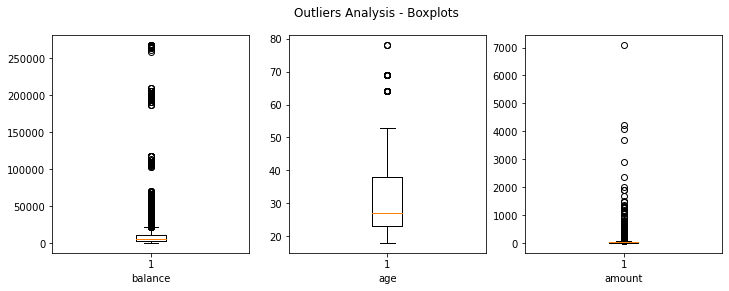

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Outliers Analysis - Boxplots')
axes[0].boxplot(Trans.balance)
axes[0].set_xlabel('balance')
axes[1].boxplot(Trans.age)
axes[1].set_xlabel('age')
axes[2].boxplot(Trans.amount)
axes[2].set_xlabel('amount')

In [78]:
# save the extreme amount
extreme_amount = Trans[Trans.amount>7000]
# remove extreme amount (outlier)
Trans.drop(Trans[Trans.amount>7000].index, inplace=True)

both missing value and outliers are handled

In [82]:
Trans.head()

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [84]:
Trans.to_excel('Transactions Cleaned.xlsx')